# **Лабораторная работа 4**

In [287]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# **Загрузка данных**

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [289]:
# Загрузка данных из загруженного файла
data = pd.read_csv('dataset_traffic_accident_prediction1.csv')

# **Подготовка данных**

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [291]:
# Основная информация о данных
display(data.head())
display(data.describe())

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [292]:
# Удаление пропущенных значений
data = data.dropna()

In [293]:
# Удаление дубликатов
data_cleaned = data.drop_duplicates()

In [294]:
# Проверка на пропуски после обработкиabs
data_cleaned.isna().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

In [295]:
# Типизация данных
data_cleaned['Accident'] = data_cleaned['Accident'].astype(int)

data_cleaned.head()

/tmp/ipykernel_392/3356656262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Accident'] = data_cleaned['Accident'].astype(int)


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1


# **Анализ и исследование данных**

In [296]:
# Основные статистики для числовых данных
data_cleaned.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,1.017812,70.641221,3.284987,0.147583,43.651399,39.071247,0.290076
std,0.787134,32.414425,2.105678,0.355138,15.166528,15.368435,0.454376
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,31.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,53.000000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [297]:
custom_palette = ['#32CD32','#B22222']

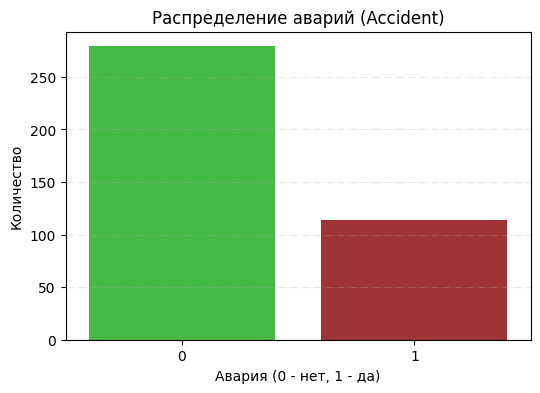

In [298]:
# Распределение Accident
plt.figure(figsize=(6, 4))
sns.countplot(data=data_cleaned, x='Accident', hue='Accident', palette=custom_palette, legend=False)
plt.title('Распределение аварий (Accident)')
plt.xlabel('Авария (0 - нет, 1 - да)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle="-.", alpha=0.3)
plt.show()


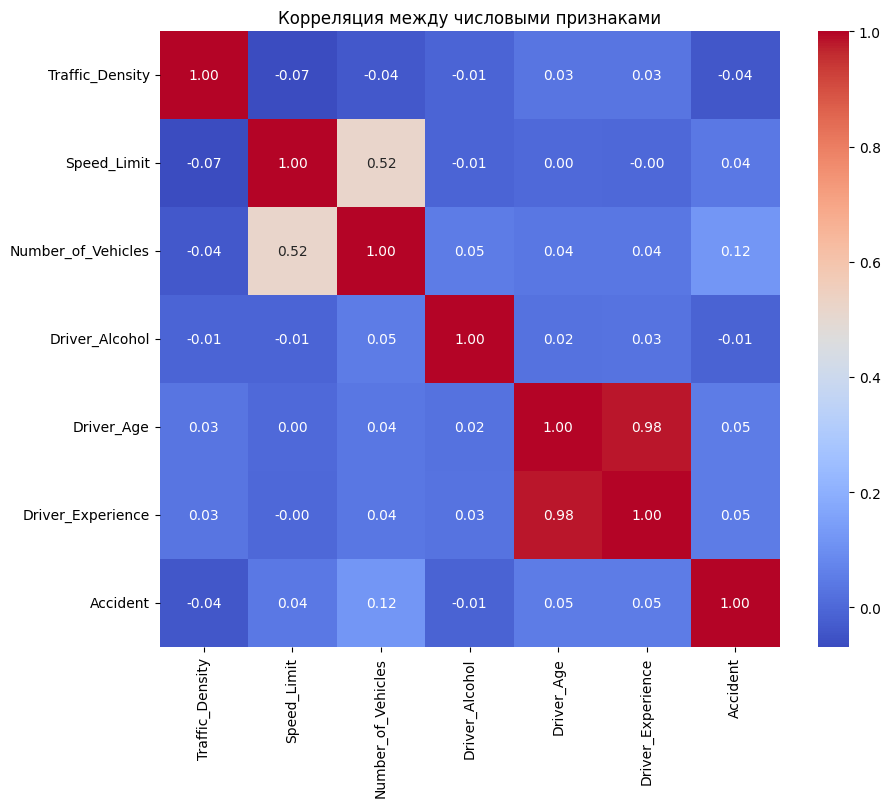

In [299]:
# Список числовых столбцов
numerical_cols = data_cleaned.select_dtypes(include=['number']).columns.to_list()

# Корреляция между числовыми признаками
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между числовыми признаками')
plt.show()


# **Гипотеза**

**Гипотеза:** \
\
Вероятность возникновения аварии на дороге (Accident) увеличивается при высоком уровне плотности движения (Traffic_Density), неблагоприятных погодных условиях (Weather), и у водителей с низким опытом.


**Обоснование гипотезы:**
1) В условиях высокой загруженности дорог вероятность аварии возрастает из-за увеличения числа маневров, ошибок и взаимодействий между транспортными средствами.
2) Дождь, снег или туман ухудшают видимость и сцепление с дорогой, что может привести к аварии.
3) У водителей с малым опытом вероятность ошибок на дороге выше, особенно в сложных условиях.

/tmp/ipykernel_392/1952467527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_cleaned, x="Traffic_Density", y="Accident", errorbar=None, palette=custom_palette)


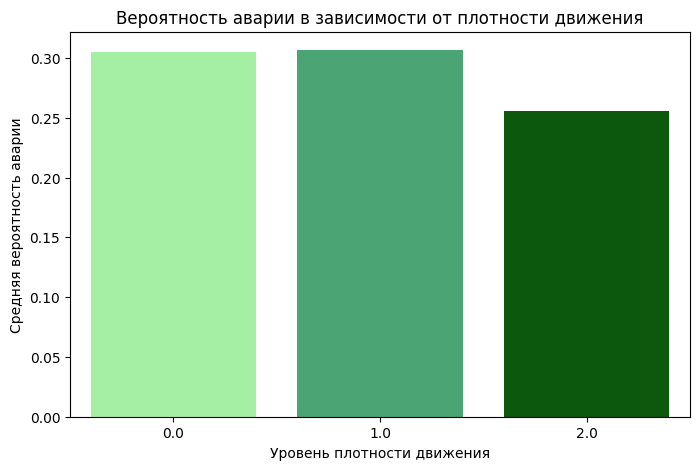

In [300]:
custom_palette = ['#98FB98','#3CB371', '#006400']

# Зависимость аварий от плотности движения (Traffic_Density)
plt.figure(figsize=(8, 5))
sns.barplot(data=data_cleaned, x="Traffic_Density", y="Accident", errorbar=None, palette=custom_palette)
plt.title("Вероятность аварии в зависимости от плотности движения")
plt.xlabel("Уровень плотности движения")
plt.ylabel("Средняя вероятность аварии")
plt.show()


/tmp/ipykernel_392/3392524559.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_cleaned, x="Weather", y="Accident", ci=None, palette=custom_palette)
/tmp/ipykernel_392/3392524559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_cleaned, x="Weather", y="Accident", ci=None, palette=custom_palette)


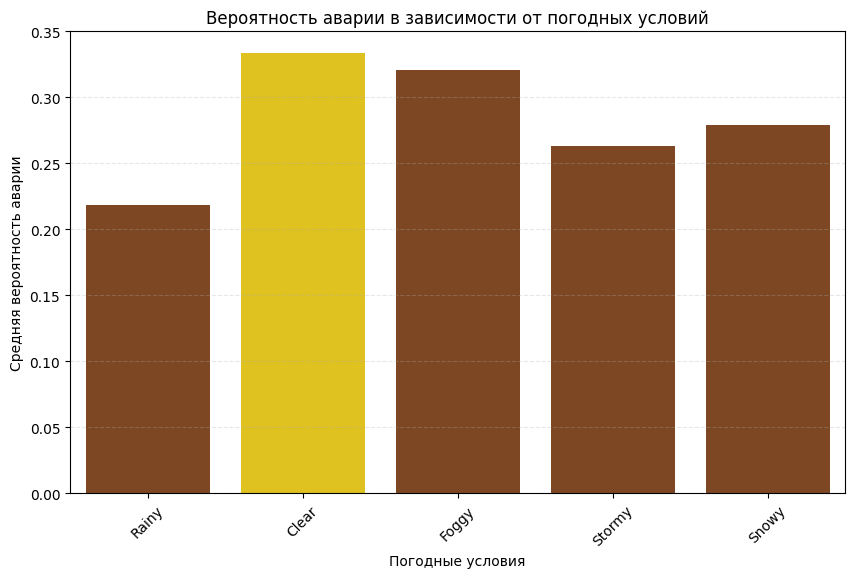

In [301]:
custom_palette = ['#8B4513','#FFD700', '#8B4513', '#8B4513', '#8B4513']

# Зависимость аварий от погодных условий (Weather)
plt.figure(figsize=(10, 6))
sns.barplot(data=data_cleaned, x="Weather", y="Accident", ci=None, palette=custom_palette)
plt.title("Вероятность аварии в зависимости от погодных условий")
plt.xlabel("Погодные условия")
plt.ylabel("Средняя вероятность аварии")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_392/2672077439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x="Accident", y="Driver_Experience", palette="coolwarm")


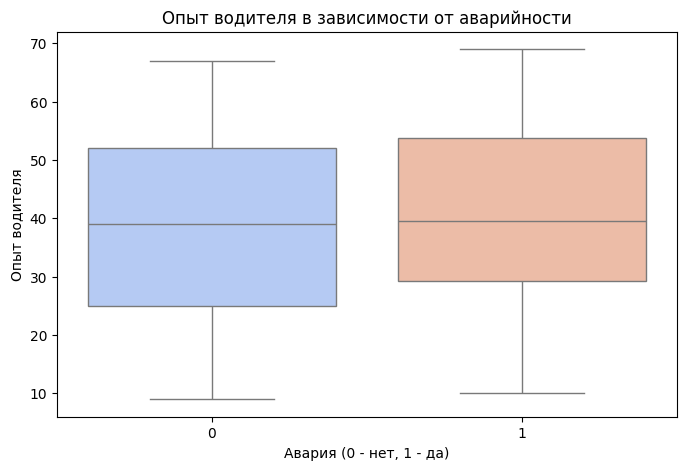

In [302]:
# Зависимость аварий от опыта водителя (Driver_Experience)
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_cleaned, x="Accident", y="Driver_Experience", palette="coolwarm")
plt.title("Опыт водителя в зависимости от аварийности")
plt.xlabel("Авария (0 - нет, 1 - да)")
plt.ylabel("Опыт водителя")
plt.show()

In [303]:
accident_grouped = data_cleaned.groupby('Accident')


accident_grouped['Driver_Experience'].median()


Accident
0    39.0
1    39.5
Name: Driver_Experience, dtype: float64

**Гипотиза опровержена**
1) При увеличении плотности движения вероятность аварии уменьшается. Это может быть связано с тем, что при плотном потоке автомобилей их общая скорость снижается, что способствует меньшему количеству столкновений.
2) В хорошую погоду средняя вероятность аварии оказывается выше. Это может быть связано с тем, что в плохую погоду водители снижают скорость и более осторожны, что снижает риск аварий.
3) Опыт водителя не влияет на вероятность аварии, что может свидетельствовать о других более значимых факторах.